# Regresion Logistica 

In [12]:
df = read.csv("Social_Network_Ads.csv")
df = df[3:5]

In [13]:
# divido el conjunto en entrenamiento y testing
library(caTools)
set.seed(123)
split = sample.split(df$Purchased, SplitRatio = 1/4)
trainSet = subset(df, split==FALSE) 
testSet = subset(df, split==TRUE) 

In [14]:
# dado que las variables tienen magnitudes muy diferentes (edades y sueldos), hay que escalarlas pa dejarlas en la misma escala
trainSet[1:2] = scale(trainSet[1:2])
testSet[1:2] = scale(testSet[1:2])

In [15]:
# uso la funcion glm (generalized linear models) para realizar la regresion logistica
clasificador = glm(formula = Purchased~.,
                    data = trainSet,
                    family = binomial) # para que la regresion logistica sea lineal hay que poner binomial

In [16]:
# calcular el vector con las predicciones de mi clasificador
# esto de aqui es la probabilidad, no solo 1's y 0's
probabilidad_prediccion_compra = predict(clasificador, type="response", # type = "response" es para que nos de un vector 
                                        newdata = testSet[, 1:2])
# aqui los transformo en 1's y 0's
y_pred = ifelse(probabilidad_prediccion_compra > 0.5, 1, 0)
y_pred

6  16  27  30  31  44  49  50  53  55  56  60  61  62  64  67  70  72  73  76 
  0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
 79  92  94  99 100 105 110 111 116 118 130 133 136 145 147 149 150 151 167 168 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
169 171 172 173 174 179 180 184 186 194 196 198 203 205 209 212 217 221 222 223 
  0   0   0   0   0   0   0   0   0   0   0   0   1   1   1   1   1   1   0   1 
231 233 240 248 249 250 252 262 270 271 276 279 280 282 283 285 289 304 313 322 
  1   1   1   1   0   0   0   1   0   1   1   1   1   0   0   1   1   0   0   1 
329 333 334 338 342 344 345 350 355 356 370 375 377 384 386 387 393 397 398 399 
  1   1   0   0   0   1   1   0   0   1   1   0   1   1   1   1   1   1   1   0

In [17]:
# a partir de la prediccion creo la matriz de confusion
# table() es la funcion que permite crear la matriz de confusion (aunque esta generalizada para poder hacer muchas otras cosas aparentemente)
y_verdadero = testSet[, 3]
matrizConfusion = table(y_verdadero, y_pred)
matrizConfusion

           y_pred
y_verdadero  0  1
          0 57  7
          1 10 26

en R aparecen los 0's y 1's en las filas y columnas y se entiende más :)

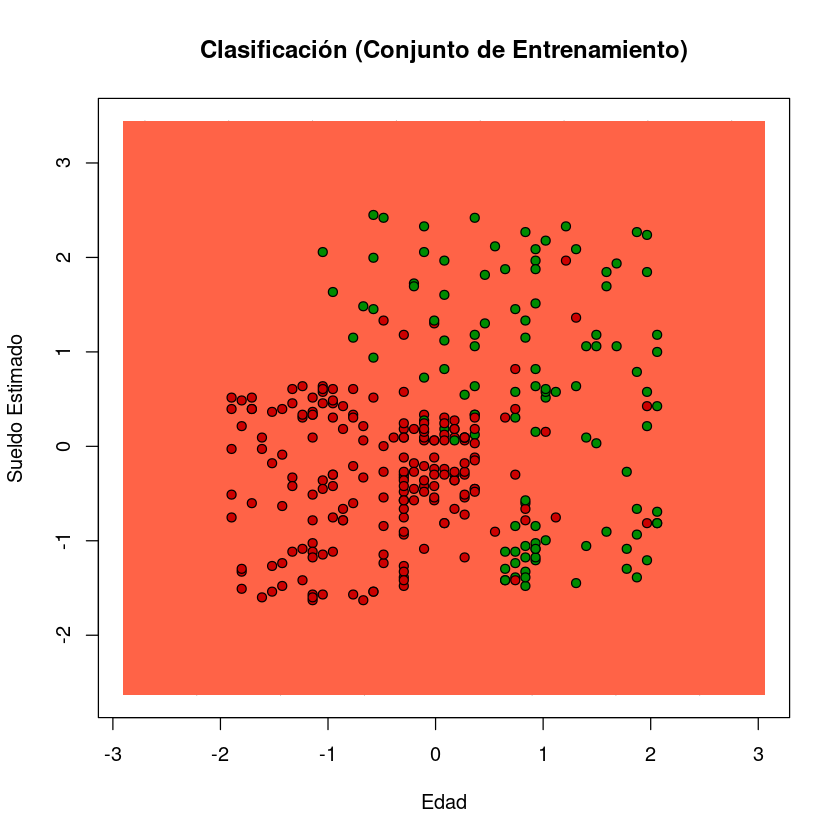

In [19]:
# copiado de la plantilla de la clase por mucho texto
# Visualización del conjunto de entrenamiento
#install.packages("ElemStatLearn")
set = trainSet
X1 = seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 = seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set = expand.grid(X1, X2)
colnames(grid_set) = c('Age', 'EstimatedSalary')
y_grid = predict(clasificador, newdata = grid_set)
plot(set[, -3],
     main = 'Clasificación (Conjunto de Entrenamiento)',
     xlab = 'Edad', ylab = 'Sueldo Estimado',
     xlim = range(X1), ylim = range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add = TRUE)
points(grid_set, pch = '.', col = ifelse(y_grid == 1, 'springgreen3', 'tomato'))
points(set, pch = 21, bg = ifelse(set[, 3] == 1, 'green4', 'red3'))